# Statistical Learning with Python

In [21]:
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")

In [9]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='sales', ylabel='TV'>

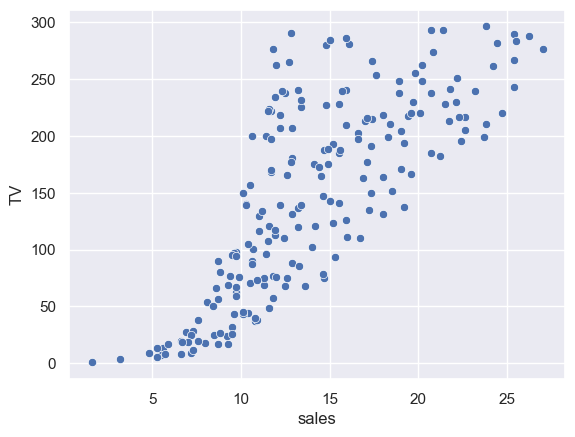

In [23]:
sns.scatterplot(data = df,
                x = "sales",
                y = "TV"
               )

<Axes: title={'center': 'Sales vs TV advertisement'}, xlabel='TV', ylabel='sales'>

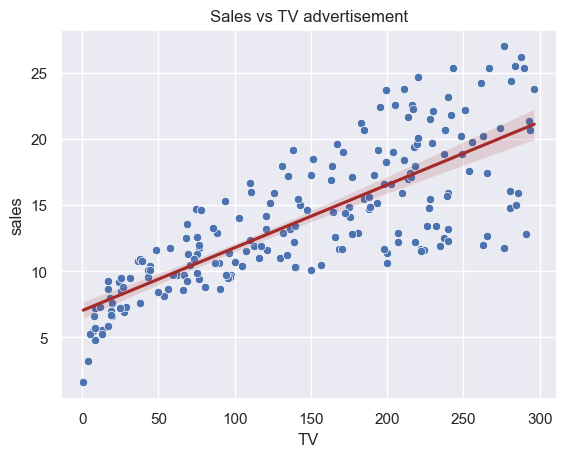

In [77]:
sns.scatterplot(data=df, x="TV", y="sales").set(title="Sales vs TV advertisement")
sns.regplot(data=df, x="TV", y="sales", scatter=False, color="brown")

<Axes: title={'center': 'Sales vs Radio advertisement'}, xlabel='radio', ylabel='sales'>

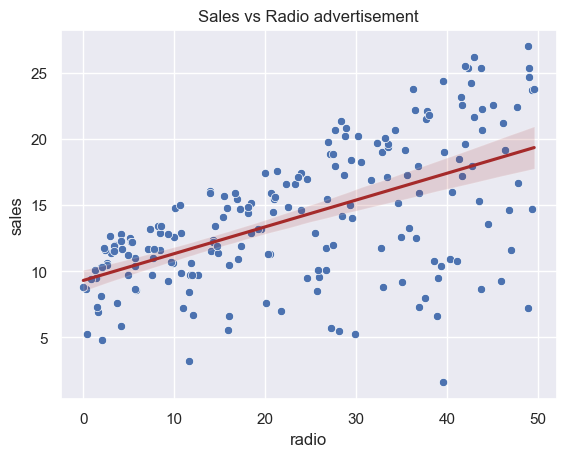

In [79]:
sns.scatterplot(data=df, x="radio", y="sales").set(title="Sales vs Radio advertisement")
sns.regplot(data=df, x="radio", y="sales", scatter=False, color="brown")

<Axes: title={'center': 'Sales vs Newspaper advertisement'}, xlabel='newspaper', ylabel='sales'>

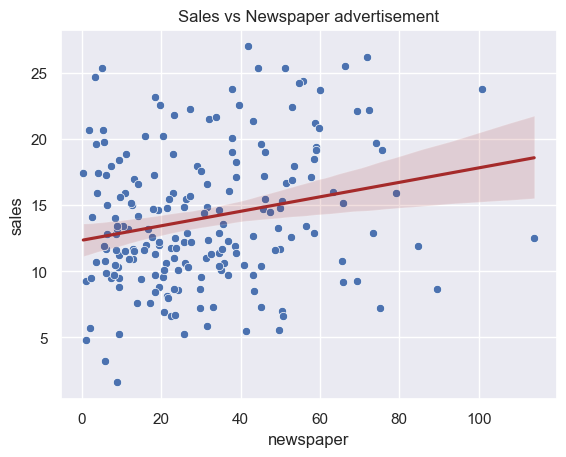

In [81]:
sns.scatterplot(data=df, x="newspaper", y="sales").set(title="Sales vs Newspaper advertisement")
sns.regplot(data=df, x="newspaper", y="sales", scatter=False, color="brown")

<Axes: >

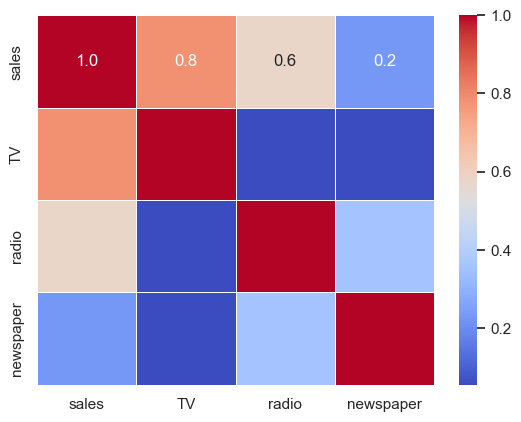

In [109]:
sns.heatmap(df[["sales","TV", "radio", "newspaper"]].corr(), 
            annot=True, 
            fmt="0.1f",
            linewidth=0.5,
            cmap="coolwarm"
           )